In [18]:
# import torch
import pandas as pd

# Path to the extracted CSV file
file_path = 'HI-Medium_Trans.csv'

# Load first 100k rows to inspect
df_sample = pd.read_csv(file_path, nrows=100000)
df_sample.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [19]:
df = pd.read_csv(file_path, low_memory=False)


In [20]:
# Rename for easier access
df.columns = [
    'timestamp', 'from_bank', 'from_account', 'to_bank', 'to_account',
    'amount_received', 'receiving_currency', 'amount_paid', 'payment_currency',
    'payment_format', 'is_laundering'
]

In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           object 
 1   from_bank           int64  
 2   from_account        object 
 3   to_bank             int64  
 4   to_account          object 
 5   amount_received     float64
 6   receiving_currency  object 
 7   amount_paid         float64
 8   payment_currency    object 
 9   payment_format      object 
 10  is_laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ GB


,timestamp,from_bank,from_account,to_bank,to_account,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering
count,31898238,3.189824e+07,31898238,3.189824e+07,31898238,3.189824e+07,31898238,3.189824e+07,31898238,31898238,3.189824e+07
unique,26086,NaN,2013627,NaN,1689925,NaN,15,NaN,15,7,NaN
top,2022/09/01 00:14,NaN,100428660,NaN,100428660,NaN,US Dollar,NaN,US Dollar,Cheque,NaN
freq,44215,NaN,1076979,NaN,6842,NaN,11594241,NaN,11688249,12280058,NaN
mean,NaN,2.944094e+05,NaN,4.093198e+05,NaN,6.431116e+06,NaN,4.417551e+06,NaN,NaN,1.104450e-03
std,NaN,6.153149e+05,NaN,6.547003e+05,NaN,2.592744e+09,NaN,1.848313e+09,NaN,NaN,3.321491e-02
min,NaN,0.000000e+00,NaN,0.000000e+00,NaN,1.000000e-06,NaN,1.000000e-06,NaN,NaN,0.000000e+00
25%,NaN,2.954000e+03,NaN,2.749600e+04,NaN,2.078700e+02,NaN,2.092300e+02,NaN,NaN,0.000000e+00
50%,NaN,3.902400e+04,NaN,1.468530e+05,NaN,1.469250e+03,NaN,1.471540e+03,NaN,NaN,0.000000e+00
75%,NaN,2.158840e+05,NaN,2.598930e+05,NaN,1.183530e+04,NaN,1.175781e+04,NaN,NaN,0.000000e+00


In [6]:
df['is_laundering'].value_counts(normalize=True)

0    0.998896
1    0.001104
Name: is_laundering, dtype: float64

In [7]:
df.isnull().sum()

timestamp             0
from_bank             0
from_account          0
to_bank               0
to_account            0
amount_received       0
receiving_currency    0
amount_paid           0
payment_currency      0
payment_format        0
is_laundering         0
dtype: int64

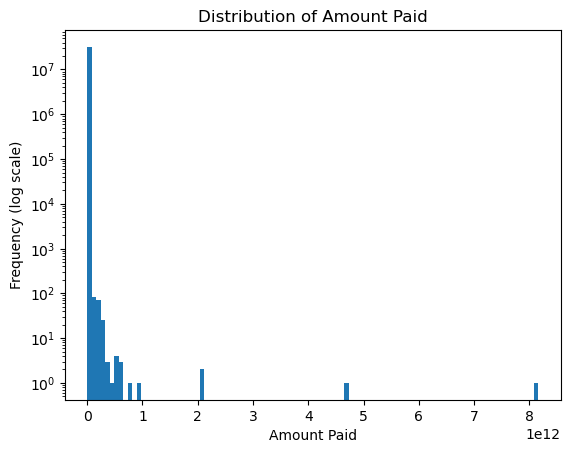

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['amount_paid'], bins=100, log=True)
plt.title('Distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('Frequency (log scale)')
plt.show()

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(f"From: {df['timestamp'].min()} To: {df['timestamp'].max()}")


From: 2022-09-01 00:00:00 To: 2022-09-28 15:58:00


In [10]:
df[['receiving_currency', 'payment_currency']].value_counts().head(10)


receiving_currency  payment_currency 
US Dollar           US Dollar            11430671
Euro                Euro                  7210831
Yuan                Yuan                  2258494
Shekel              Shekel                1407929
Canadian Dollar     Canadian Dollar       1072557
UK Pound            UK Pound              1003299
Ruble               Ruble                  973167
Australian Dollar   Australian Dollar      916834
Yen                 Yen                    845439
Swiss Franc         Swiss Franc            843096
dtype: int64

In [11]:
pd.crosstab(df['payment_format'], df['is_laundering'], normalize='index')


is_laundering,0,1
payment_format,,
ACH,0.992052,0.007948
Bitcoin,0.999646,0.000354
Cash,0.999793,0.000207
Cheque,0.999819,0.000181
Credit Card,0.999846,0.000154
Reinvestment,1.000000,0.000000
Wire,1.000000,0.000000


### Advanced EDA
Transaction frequency per account

Bank-level laundering rates

Unusual FX rates (amount_paid / amount_received)

Time-based spikes in suspicious activity


1. Transaction-Level Features
- a. FX Rate Imbalance
- b. Suspicious FX Rates

In [23]:
df['fx_rate'] = df['amount_paid'] / df['amount_received']
df['fx_rate'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)


In [24]:
# b. Suspicious FX Rates

suspicious_fx = df[df['fx_rate'] > df['fx_rate'].quantile(0.99)]
print(f"Suspicious FX Transactions: {len(suspicious_fx)}")


Suspicious FX Transactions: 236211


Laundering rate per bank

<Axes: title={'center': 'Laundering Rate by From Bank'}, xlabel='from_bank'>

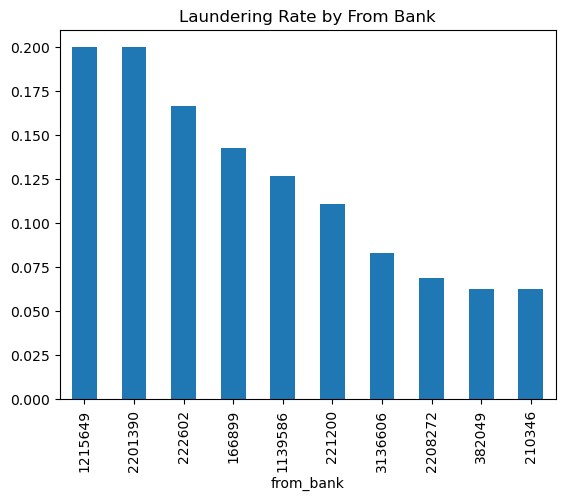

In [15]:
laundering_by_bank = df.groupby('from_bank')['is_laundering'].mean().sort_values(ascending=False)
laundering_by_bank.head(10).plot(kind='bar', title='Laundering Rate by From Bank')


In [16]:
df[df['from_bank'] == 1215649]

,timestamp,from_bank,from_account,to_bank,to_account,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering,fx_rate
879857,2022-09-01 00:18:00,1215649,84F4BED60,1215649,84F4BED60,71.55,Yuan,71.55,Yuan,Reinvestment,0,1.0
881176,2022-09-01 00:08:00,1215649,8516F0230,1215649,8516F0230,30478.56,Yuan,30478.56,Yuan,Reinvestment,0,1.0
4815313,2022-09-02 02:19:00,1215649,84F33CF30,2127900,84F33CF80,382.65,Yuan,382.65,Yuan,ACH,0,1.0
8058386,2022-09-03 15:53:00,1215649,84F4BED60,243541,84F4BF260,24296.19,Yuan,24296.19,Yuan,ACH,1,1.0
26309265,2022-09-14 15:36:00,1215649,8516F0230,2198812,8516EFBF0,30085.80,Yuan,30085.80,Yuan,ACH,0,1.0


Text(0.5, 1.0, 'Amount Paid by Laundering Class')

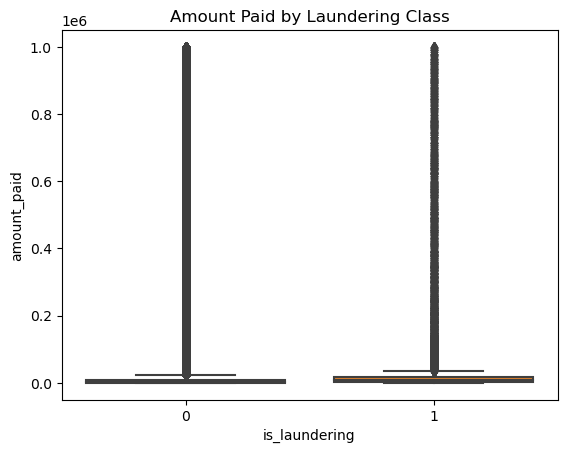

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# bank_matrix = pd.crosstab(df['from_bank'], df['to_bank'])
# plt.figure(figsize=(12,8))
# sns.heatmap(bank_matrix, cmap='Blues', cbar=True)
# plt.title('Heatmap of Transactions: From Bank to To Bank')
# plt.show()

sns.boxplot(x='is_laundering', y='amount_paid', data=df[df['amount_paid'] < 1e6])
plt.title('Amount Paid by Laundering Class')


In [14]:
high_value_tx = df[df['amount_paid'] > df['amount_paid'].quantile(0.99)]
high_value_laundering = high_value_tx['is_laundering'].mean()
print(f"High-Value Transaction Laundering Rate: {high_value_laundering:.2%}")


High-Value Transaction Laundering Rate: 0.15%


In [15]:
df['account_pair'] = df['from_account'].astype(str) + ' → ' + df['to_account'].astype(str)
repeat_pairs = df['account_pair'].value_counts()
repeat_pairs[repeat_pairs > 1].head(10)


800072260 → 800072260    118
8004747B0 → 8004747B0    114
813795790 → 813795790    114
8000E7940 → 8000E7940    113
80077FA10 → 80077FA10    113
81205C200 → 81205C200    113
801AB0360 → 801AB0360    112
8000B11D0 → 8000B11D0    111
81E186BF0 → 81E186BF0    106
80AE12EB0 → 80AE12EB0    106
Name: account_pair, dtype: int64

In [21]:
df['bank_account_pair'] = df['from_bank'].astype(str) + ' → ' + df['to_bank'].astype(str)
bank_repeat_pairs = df['bank_account_pair'].value_counts()
bank_repeat_pairs[bank_repeat_pairs > 1].head(10)


27 → 27      17146
112 → 112    14785
12 → 12      14353
0 → 0        11577
20 → 20      10745
11 → 11      10407
114 → 114     9672
15 → 15       9524
70 → 27       7728
70 → 11       6803
Name: bank_account_pair, dtype: int64

Correlation matrix

<Axes: >

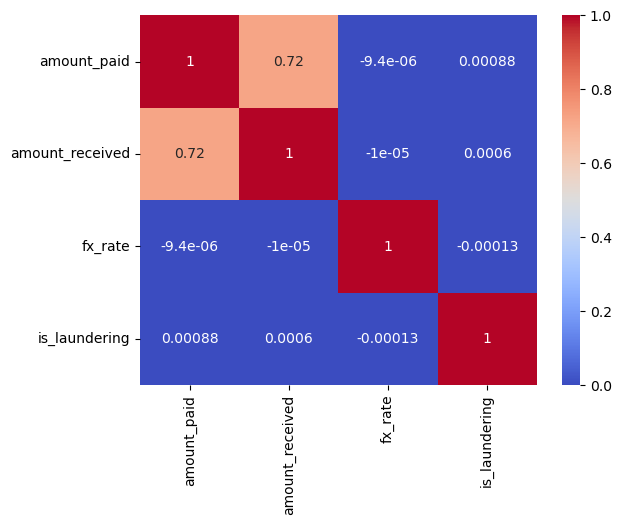

In [25]:
numeric_df = df[['amount_paid', 'amount_received', 'fx_rate', 'is_laundering']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


###  Expanded correlation matrix with more fields 

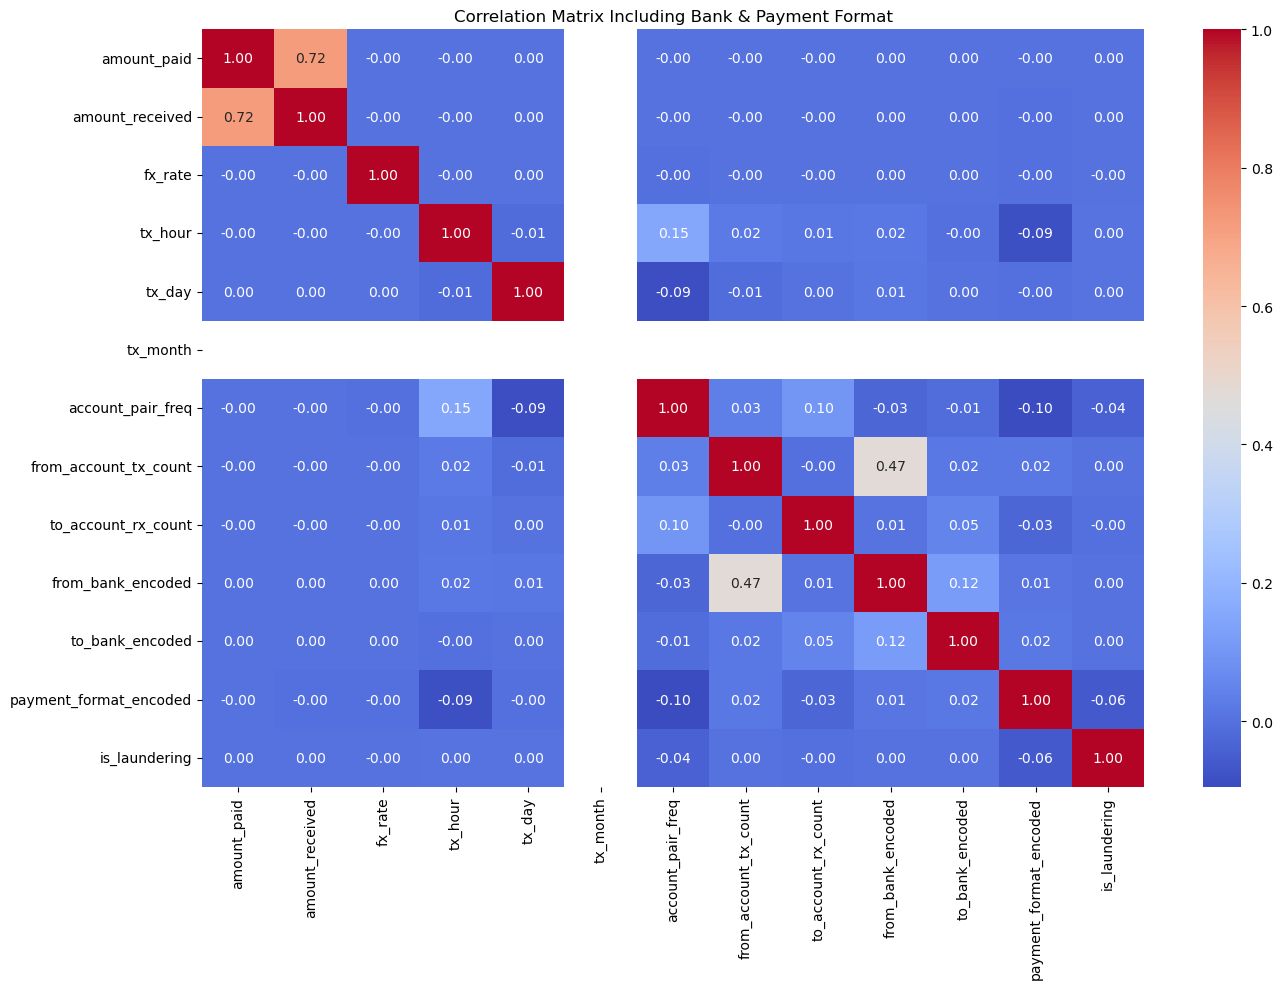

In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Create fx_rate
df['fx_rate'] = np.where(df['amount_received'] == 0, np.nan, df['amount_paid'] / df['amount_received'])

# Time-based features
df['tx_hour'] = df['timestamp'].dt.hour
df['tx_day'] = df['timestamp'].dt.dayofweek
df['tx_month'] = df['timestamp'].dt.month

# Frequency-based features
df['account_pair'] = df['from_account'].astype(str) + ' → ' + df['to_account'].astype(str)
df['account_pair_freq'] = df.groupby('account_pair')['account_pair'].transform('count')
df['from_account_tx_count'] = df.groupby('from_account')['from_account'].transform('count')
df['to_account_rx_count'] = df.groupby('to_account')['to_account'].transform('count')

# Label encode from_bank, to_bank, and payment_format
label_cols = ['from_bank', 'to_bank', 'payment_format']
le = LabelEncoder()

for col in label_cols:
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

# Select numeric features
numeric_df = df[[
    'amount_paid', 'amount_received', 'fx_rate',
    'tx_hour', 'tx_day', 'tx_month',
    'account_pair_freq', 'from_account_tx_count', 'to_account_rx_count',
    'from_bank_encoded', 'to_bank_encoded', 'payment_format_encoded',
    'is_laundering'
]]

# Drop rows with missing values
corr_df = numeric_df.dropna()

# Compute and plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Bank & Payment Format')
plt.tight_layout()
plt.show()
